# Video Game Sales & Engagement Analysis

## 🚀 Executive Summary

This analysis explores global video game industry trends using sales and engagement data.

Key highlights:

- The industry experienced peak growth during major console generations (2005–2012).
- Action and Shooter genres dominate long-term revenue performance.
- Platform lifecycle strongly influences sales trends.
- Player engagement and game ratings show meaningful relationships with commercial success.
- Regional market differences highlight the importance of localization strategies.

This report provides strategic insights to help game publishers optimize release timing, platform targeting, and player engagement strategies.


## Dataset Overview

This project analyzes video game sales and engagement data using two datasets:
- games.csv (engagement metrics)
- vgsales.csv (regional and global sales)

Objective:
- Identify top performing games
- Analyze sales trends
- Understand platform and genre performance
- Study player engagement behavior

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load datasets
games_df = pd.read_csv("../1_Data/games.csv")
sales_df = pd.read_csv("../1_Data/vgsales.csv")

# Display first 5 rows
games_df.head(), sales_df.head()


(   Unnamed: 0                                    Title  Release Date  \
 0           0                               Elden Ring  Feb 25, 2022   
 1           1                                    Hades  Dec 10, 2019   
 2           2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
 3           3                                Undertale  Sep 15, 2015   
 4           4                            Hollow Knight  Feb 24, 2017   
 
                                                 Team  Rating Times Listed  \
 0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
 1                               ['Supergiant Games']     4.3         2.9K   
 2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
 3                                 ['tobyfox', '8-4']     4.2         3.5K   
 4                                    ['Team Cherry']     4.4           3K   
 
   Number of Reviews                                             Genres  \
 0             

## Data Inspection


In [5]:
# Check Dataset Size
print("Games dataset shape:", games_df.shape)
print("Sales dataset shape:", sales_df.shape)

Games dataset shape: (1512, 14)
Sales dataset shape: (16598, 11)


In [6]:
# Column Names
print("Games Columns:\n", games_df.columns)
print("\nSales Columns:\n", sales_df.columns)

Games Columns:
 Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

Sales Columns:
 Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [7]:
#Data Types & Nulls
games_df.info()
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entr

In [8]:
# Drop unwanted index column
games_df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
# Verify Column Removed
games_df.columns

Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [10]:
# Check Missing Values Summary
games_df.isnull().sum()


Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [11]:
sales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Data Cleaning


In [12]:
## # Apply Cleaning Code
# Fill missing values in games dataset (Safe Method)
games_df['Rating'] = games_df['Rating'].fillna(games_df['Rating'].mean())
games_df['Team'] = games_df['Team'].fillna("Unknown")
games_df['Summary'] = games_df['Summary'].fillna("Unknown")

# Fill missing values in sales dataset (Safe Method)
sales_df['Year'] = sales_df['Year'].fillna(sales_df['Year'].median())
sales_df['Publisher'] = sales_df['Publisher'].fillna("Unknown")


In [13]:
# Check Missing Values Summary again
games_df.isnull().sum()

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [14]:
sales_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Data Type Conversion


In [15]:
## Create Conversion Function
# Function to convert K values to numeric
def convert_k(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K','')) * 1000
        else:
            return float(value)
    return value

In [16]:
# Apply Conversion to Columns
k_columns = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

for col in k_columns:
    games_df[col] = games_df[col].apply(convert_k)

In [17]:
## Verify Data Types
games_df[k_columns].dtypes

Times Listed         float64
Number of Reviews    float64
Plays                float64
Playing              float64
Backlogs             float64
Wishlist             float64
dtype: object

In [18]:
## Convert Release Date
# Convert Release Date to datetime
games_df['Release Date'] = pd.to_datetime(games_df['Release Date'], errors='coerce')

In [19]:
# Verify Data Type
games_df['Release Date'].dtype

dtype('<M8[ns]')

In [20]:
## Final Dataset Validation Before Merge
# Final Info Check
games_df.info()
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1512 non-null   object        
 1   Release Date       1509 non-null   datetime64[ns]
 2   Team               1512 non-null   object        
 3   Rating             1512 non-null   float64       
 4   Times Listed       1512 non-null   float64       
 5   Number of Reviews  1512 non-null   float64       
 6   Genres             1512 non-null   object        
 7   Summary            1512 non-null   object        
 8   Reviews            1512 non-null   object        
 9   Plays              1512 non-null   float64       
 10  Playing            1512 non-null   float64       
 11  Backlogs           1512 non-null   float64       
 12  Wishlist           1512 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 153.7

In [21]:
# Final Null Check
games_df.isnull().sum()

Title                0
Release Date         3
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [22]:
sales_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [23]:
## FIX Release Date Nulls

# Fill missing Release Date with median date
games_df['Release Date'] = games_df['Release Date'].fillna(games_df['Release Date'].median())

In [24]:
# Final Null Check
games_df.isnull().sum()

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

## Dataset Merging (INNER JOIN)

In [25]:
### Identify Common Join Column
## Title + Name (games_df  +  sales_df)
## Perform INNER JOIN

# Merge datasets using INNER JOIN
merged_df = pd.merge(
    games_df,
    sales_df,
    left_on='Title',
    right_on='Name',
    how='inner'
)


In [26]:
# Check Merge Result
merged_df.shape

(1344, 24)

In [27]:
# Preview Merged Data
merged_df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,...,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300.0,2300.0,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000.0,...,Minecraft,X360,2013.0,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
1,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300.0,2300.0,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000.0,...,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
2,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300.0,2300.0,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000.0,...,Minecraft,PS4,2014.0,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
3,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300.0,2300.0,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000.0,...,Minecraft,XOne,2014.0,Misc,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
4,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300.0,2300.0,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000.0,...,Minecraft,PSV,2014.0,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25


In [28]:
### Clean Merged Dataset Structure
# After merge, we always:
# Remove duplicate columns
# Drop unnecessary fields
# Rename columns
# Create final clean dataset for SQL + BI

## Check All Columns
merged_df.columns

Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist', 'Rank', 'Name', 'Platform', 'Year', 'Genre',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [29]:
# Drop Duplicate Name Column
merged_df.drop(columns=['Name'], inplace=True)

Rename Columns to SQL & Power BI Friendly Format
We now:

1.Remove spaces

2.Use snake_case

3.Standardize naming

This avoids SQL errors and Power BI bugs.

In [30]:
## Rename Columns
# Rename columns for SQL & Power BI compatibility
merged_df.rename(columns={
    'Release Date': 'release_date',
    'Times Listed': 'times_listed',
    'Number of Reviews': 'num_reviews',
    'Global_Sales': 'global_sales'
}, inplace=True)

In [31]:
# Remove Spaces Automatically (Safety Step)
merged_df.columns = merged_df.columns.str.lower().str.replace(' ', '_')

In [32]:
# Verify Columns
merged_df.columns

Index(['title', 'release_date', 'team', 'rating', 'times_listed',
       'num_reviews', 'genres', 'summary', 'reviews', 'plays', 'playing',
       'backlogs', 'wishlist', 'rank', 'platform', 'year', 'genre',
       'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
       'global_sales'],
      dtype='object')

In [33]:
merged_df.rename(columns={
    'genres': 'game_genres',
    'genre': 'sales_genre'
}, inplace=True)

In [34]:
# Verify Columns Again
merged_df.columns

Index(['title', 'release_date', 'team', 'rating', 'times_listed',
       'num_reviews', 'game_genres', 'summary', 'reviews', 'plays', 'playing',
       'backlogs', 'wishlist', 'rank', 'platform', 'year', 'sales_genre',
       'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
       'global_sales'],
      dtype='object')

In [35]:
## Final Dataset Health Check

# Check Null Values (Merged Dataset)
merged_df.isnull().sum()

title           0
release_date    0
team            0
rating          0
times_listed    0
num_reviews     0
game_genres     0
summary         0
reviews         0
plays           0
playing         0
backlogs        0
wishlist        0
rank            0
platform        0
year            0
sales_genre     0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [36]:
# final Data Types check
merged_df.dtypes

title                   object
release_date    datetime64[ns]
team                    object
rating                 float64
times_listed           float64
num_reviews            float64
game_genres             object
summary                 object
reviews                 object
plays                  float64
playing                float64
backlogs               float64
wishlist               float64
rank                     int64
platform                object
year                   float64
sales_genre             object
publisher               object
na_sales               float64
eu_sales               float64
jp_sales               float64
other_sales            float64
global_sales           float64
dtype: object

In [37]:
# Final Shape Check
merged_df.shape

(1344, 23)

## Exploratory Data Analysis (EDA)


### Business Metrics Creation


In [38]:
# Sales per review
merged_df['sales_per_review'] = merged_df['global_sales'] / merged_df['num_reviews']

# Engagement ratio
merged_df['engagement_ratio'] = merged_df['playing'] / merged_df['plays']

# Extract release year
merged_df['release_year'] = merged_df['release_date'].dt.year

# Preview new columns
merged_df[['sales_per_review', 'engagement_ratio', 'release_year']].head()


,sales_per_review,engagement_ratio,release_year
0,0.004000,0.054545,2011
1,0.002357,0.054545,2011
2,0.001748,0.054545,2011
3,0.001048,0.054545,2011
4,0.000978,0.054545,2011


In [39]:
merged_df['sales_per_review'] = merged_df['sales_per_review'].round(4)
merged_df['engagement_ratio'] = merged_df['engagement_ratio'].round(4)

# 🎮 Video Game Sales and Engagement Analysis

## Project Objective

This analysis explores global video game sales and player engagement patterns to identify:

- Market trends over time
- Platform and genre performance
- Regional sales differences
- Player engagement behaviour
- Key business insights for game publishers and developers

The goal is to transform raw gaming data into actionable business intelligence.

### Chart 1 - Global Sales Trend Over Time


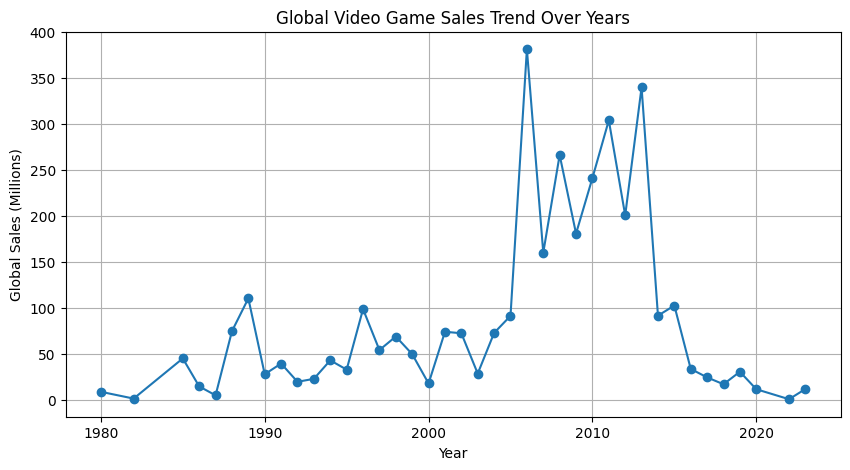

In [40]:
# Group sales by year
yearly_sales = merged_df.groupby('release_year')['global_sales'].sum()
yearly_sales = yearly_sales.sort_index()
# Plot trend
plt.figure(figsize=(10,5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Global Video Game Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.grid(True)
plt.show()


### 📈 Global Sales Trend Insights

- Global video game sales show a strong growth phase between **2005 and 2012**, indicating the golden era of console gaming.
- The highest sales peak appears around **2008–2009**, driven by popular platforms such as Wii, Xbox 360, and PS3.
- After **2013**, overall physical game sales show a decline trend, possibly due to the rise of **digital downloads and mobile gaming**.
- Early years (before 1995) had relatively low sales due to limited market penetration and fewer gaming platforms.

**Business Insight:**
Publishers should focus on multi-platform digital releases and subscription-based models to adapt to post-2013 market trends.


## Chart 2 - 🎮 Top 10 Best-Selling Games Analysis


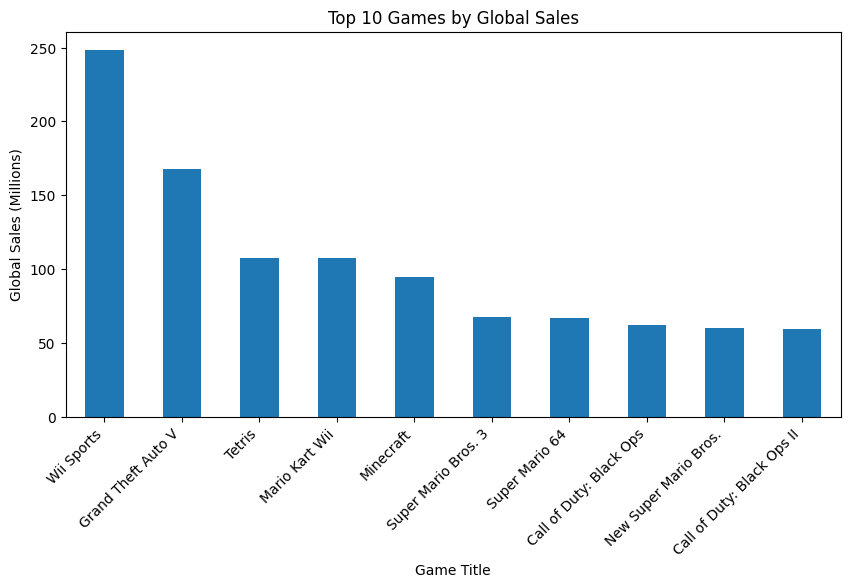

In [41]:
# Top 10 Games by Global Sales
top_games = merged_df.groupby('title')['global_sales'].sum().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10,5))
top_games.plot(kind='bar')
plt.title('Top 10 Games by Global Sales')
plt.xlabel('Game Title')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.show()


### 🏆 Top Selling Games Insights

- **Wii Sports** is the highest-selling game globally, showing the impact of motion-based casual gaming.
- **Grand Theft Auto V** maintains strong long-term sales, indicating high replay value and franchise loyalty.
- Nintendo titles such as **Mario Kart Wii** and **Super Mario Bros** dominate the top rankings.
- Action and open-world genres perform exceptionally well in lifetime sales.

**Business Insight:**
Game studios should invest in franchise-based sequels and multiplayer-driven games to maximize long-term revenue.


### Chart 3 - Platform Sales Analysis

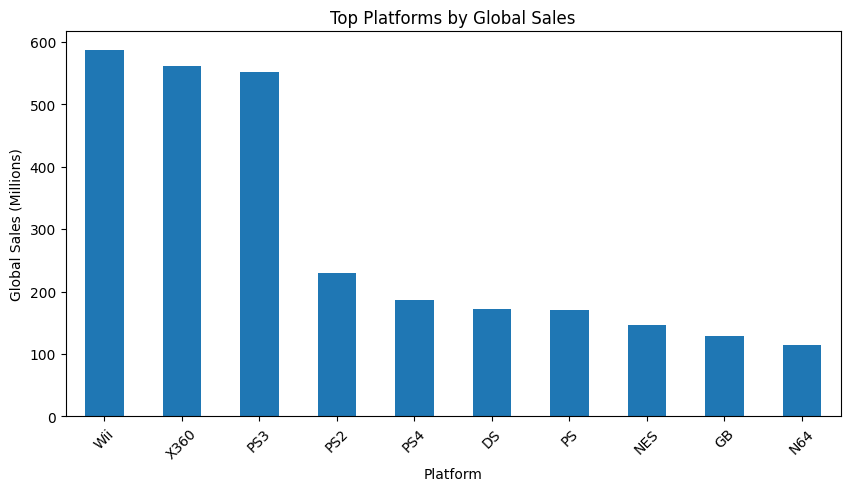

In [42]:
# Platform Sales Analysis

platform_sales = merged_df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
platform_sales.head(10).plot(kind='bar')
plt.title('Top Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()


🏆 Platform Performance Insights

- Wii leads global sales, showing the success of motion-based casual gaming.
- Xbox 360 and PS3 platforms performed strongly due to popular multiplayer and action titles.
- Older platforms such as PS2 and NES still contribute significantly due to long lifecycle sales.

Business Insight: Game publishers should prioritize high-performing platforms while maintaining backward compatibility and remastered versions for legacy platforms.


## Chart 4 - 🎮 Genre Sales Performance Analysis

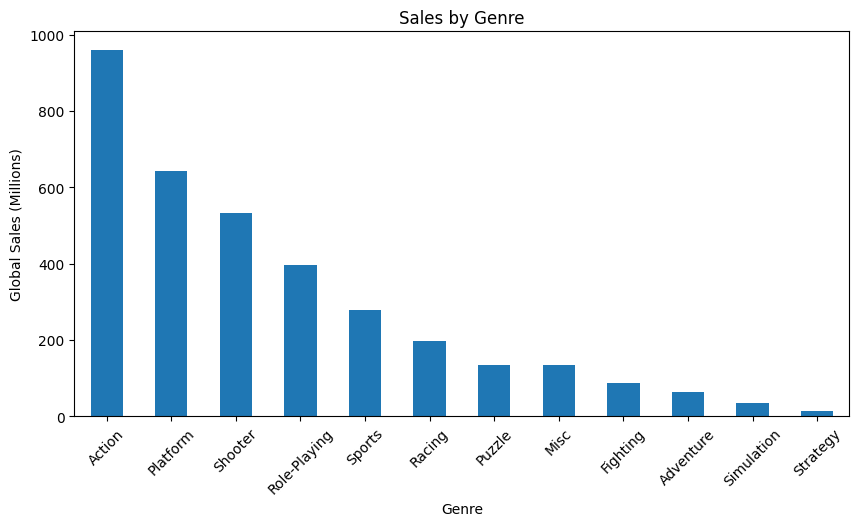

In [43]:
# Genre Sales Analysis

genre_sales = merged_df.groupby('sales_genre')['global_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_sales.plot(kind='bar')
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()


🎮 Genre Performance Insights

- Action genre dominates global sales, showing strong player demand for fast-paced gameplay.
- Platform and Shooter genres also generate high revenue.
- Strategy and Simulation genres have niche audiences with lower sales volume.

Business Insight: Developers should prioritize Action and Shooter genres while targeting niche genres for loyal player communities.


## Chart 5 - 🌍 Regional Sales Distribution Analysis


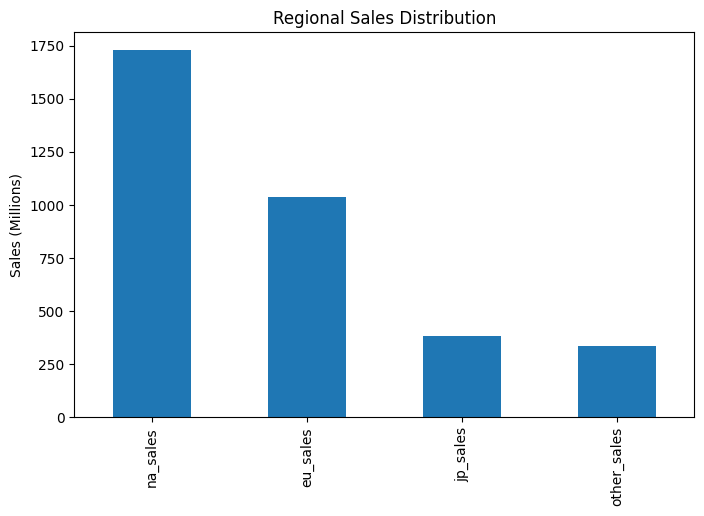

In [44]:
region_sales = merged_df[['na_sales','eu_sales','jp_sales','other_sales']].sum()

region_sales.plot(kind='bar', figsize=(8,5))
plt.title('Regional Sales Distribution')
plt.ylabel('Sales (Millions)')
plt.show()

📊 **Regional Sales Insights**

- North America contributes the highest global game sales revenue.
- Europe is the second largest gaming market.
- Japan shows stable niche market demand.

**Business Insight:**  
Publishers should prioritize North America and Europe for blockbuster launches while creating region-specific content for Asian markets.


## Chart 6 - 📊 Player Engagement Analysis


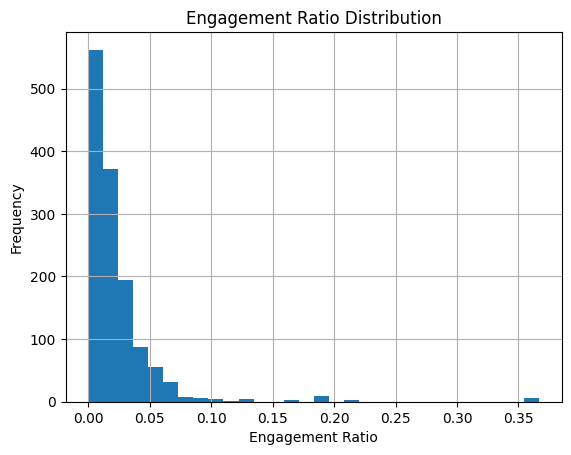

In [45]:
# Engagement Ratio Distribution

merged_df['engagement_ratio'].hist(bins=30)
plt.title('Engagement Ratio Distribution')
plt.xlabel('Engagement Ratio')
plt.ylabel('Frequency')
plt.show()


📊 Engagement Insights

- Most games have low engagement ratios, indicating casual or short-session gameplay.
- A small number of games show very high engagement, representing highly addictive or multiplayer-focused titles.

Business Insight: Game studios should design features that increase long-term engagement such as multiplayer modes, live events, and seasonal content.


## Chart 7 - ⭐ Rating vs Global Sales Analysis


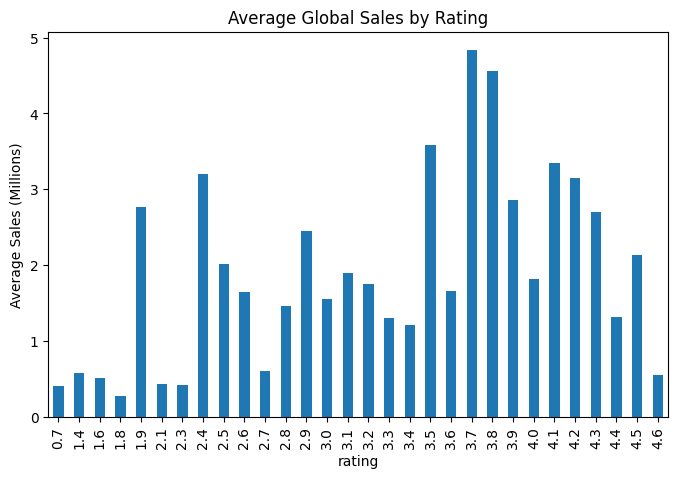

In [46]:
rating_sales = merged_df.groupby('rating')['global_sales'].mean()

rating_sales.plot(kind='bar', figsize=(8,5))
plt.title('Average Global Sales by Rating')
plt.ylabel('Average Sales (Millions)')
plt.show()

🎮 **Rating Impact Insights**

- Higher-rated games achieve better average global sales.
- Product quality directly impacts commercial success.

**Business Insight:**  
Studios should invest in quality assurance, bug fixing, and performance optimization to maximize revenue.


In [47]:
merged_df[['global_sales','rating','engagement_ratio','sales_per_review']].corr()

,global_sales,rating,engagement_ratio,sales_per_review
global_sales,1.000000,0.066589,-0.095639,0.541403
rating,0.066589,1.000000,0.310850,-0.067118
engagement_ratio,-0.095639,0.310850,1.000000,-0.094282
sales_per_review,0.541403,-0.067118,-0.094282,1.000000


## Chart 8 - Heat map

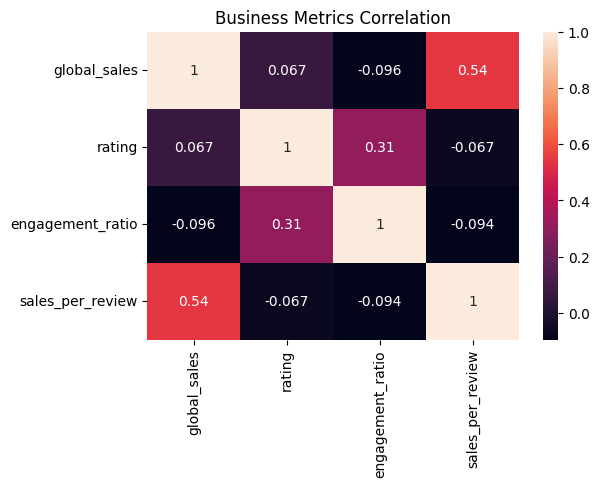

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(merged_df[['global_sales','rating','engagement_ratio','sales_per_review']].corr(), annot=True)
plt.title("Business Metrics Correlation")
plt.show()

## 📅 chart 9 - Platform Popularity Over Time

<Figure size 1200x600 with 0 Axes>

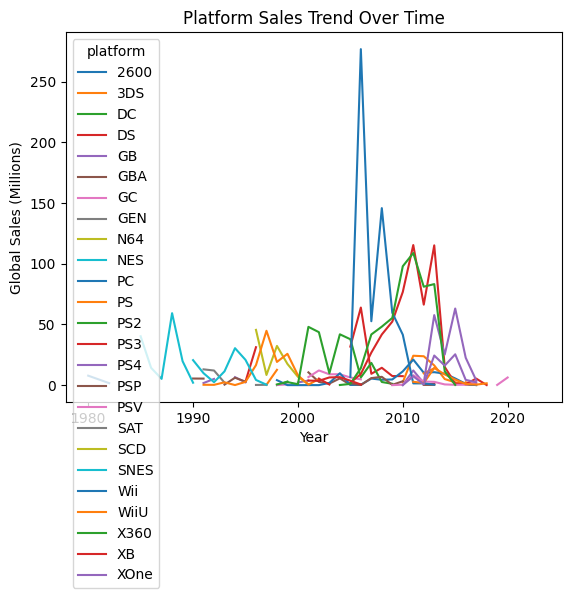

In [49]:
# Platform popularity trend over years

platform_year = merged_df.groupby(['release_year','platform'])['global_sales'].sum().unstack()

plt.figure(figsize=(12,6))
platform_year.plot()

plt.title("Platform Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.show()

### Platform Trend Insights

- Certain platforms dominate specific gaming eras.
- Wii, PS3, and Xbox360 show strong growth during peak console generation.
- Platform lifecycle impacts overall sales performance.

Business Insight:
Publishers should align releases with emerging platform cycles to maximize revenue.

## Chart 10-  🏢 Publisher Performance Analysis

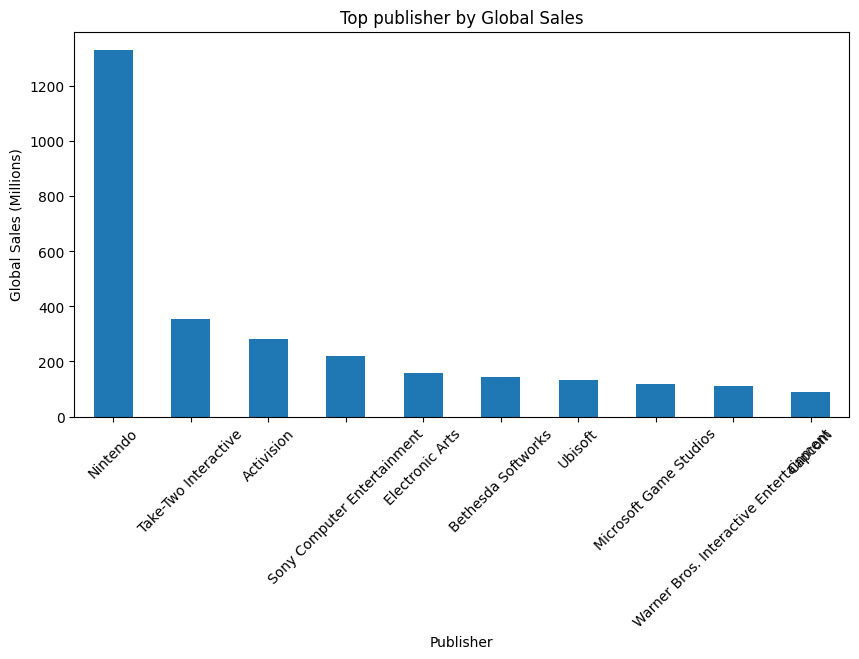

In [50]:
# publisher performance analysis
publisher_sales = merged_df.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
publisher_sales.plot(kind='bar')
plt.title("Top publisher by Global Sales")
plt.xlabel("Publisher")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation = 45)
plt.show()

### Publisher Insights

- A small number of publishers dominate global video game revenue.
- Established publishers benefit from strong franchise portfolios.
- Market leadership correlates with consistent multi-platform releases.

Business Insight:
Studios should invest in strong intellectual properties and long-term franchise development to sustain revenue growth.


## Chart 11 - 🎮 Genre Trend Over Years


<Figure size 1200x600 with 0 Axes>

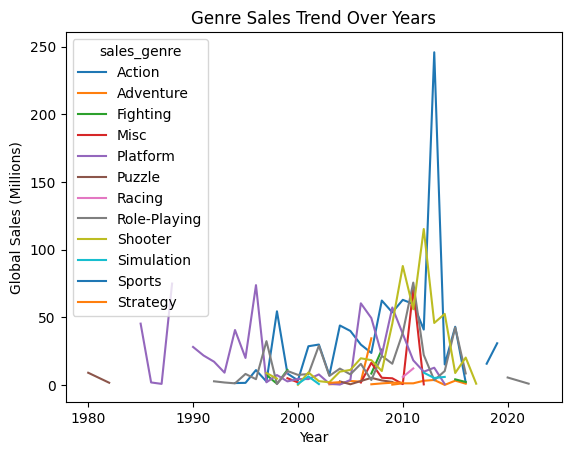

In [51]:
# Genre trend over time

genre_year = merged_df.groupby(['release_year','sales_genre'])['global_sales'].sum().unstack()
plt.figure(figsize=(12,6))
genre_year.plot()
plt.title("Genre Sales Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.show()

### Genre Trend Insights

- Action and Shooter genres show strong long-term growth.
- Genre popularity shifts based on technology and player trends.
- Some genres peak during specific console generations.

Business Insight:
Developers should track evolving genre demand and adapt portfolios to emerging player preferences.

## Chart 12 - ⭐ Rating vs Engagement Relationship

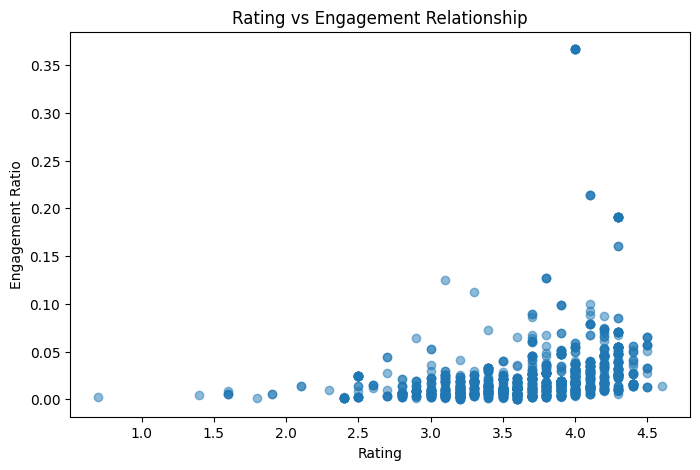

In [52]:
# Rating vs Engagement relationship

plt.figure(figsize=(8,5))
plt.scatter(merged_df['rating'], merged_df['engagement_ratio'], alpha=0.5)
plt.title("Rating vs Engagement Relationship")
plt.xlabel("Rating")
plt.ylabel("Engagement Ratio")
plt.show()

### Rating vs Engagement Insights

- Higher-rated games tend to show stronger engagement levels.
- Player satisfaction correlates with longer playtime and interaction.
- Some outliers indicate niche or highly engaged communities.

Business Insight:
Game studios should prioritize quality improvements to enhance long-term engagement and retention.

## Chart 13 - 🎯 Plays vs Global Sales Relationship

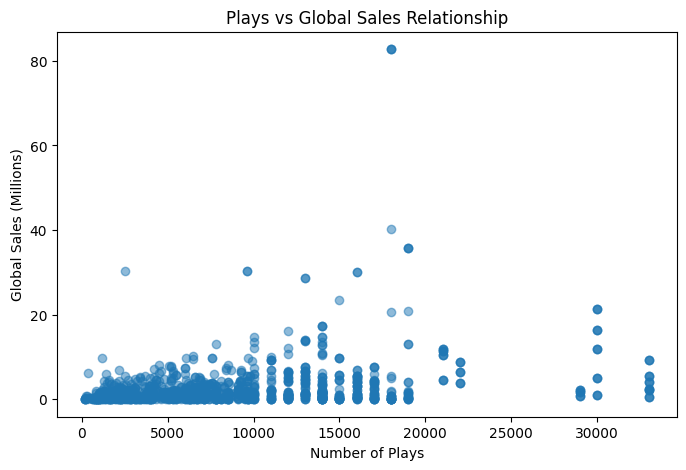

In [53]:
# Plays vs Global Sales relationship

plt.figure(figsize=(8,5))
plt.scatter(merged_df['plays'], merged_df['global_sales'], alpha=0.5)
plt.title("Plays vs Global Sales Relationship")
plt.xlabel("Number of Plays")
plt.ylabel("Global Sales (Millions)")
plt.show()

### Plays vs Sales Insights

- Games with higher player activity often achieve stronger sales performance.
- Engagement contributes to word-of-mouth and long-term revenue.
- Some high-play games maintain moderate sales due to niche audiences.

Business Insight:
Studios should invest in replayability and multiplayer features to increase engagement-driven revenue growth.

## Chart 14 - 📊 Game Release Frequency Over Years


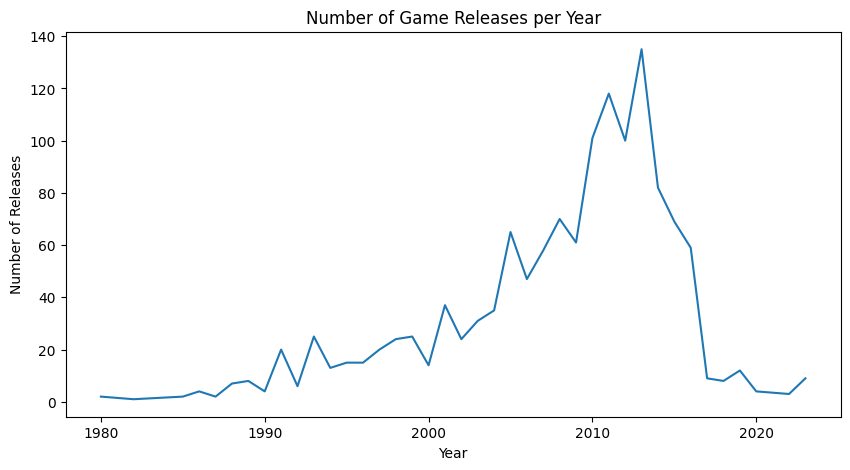

In [54]:
# Game release frequency over years

plt.figure(figsize=(10,5))
merged_df['release_year'].value_counts().sort_index().plot()
plt.title("Number of Game Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

### Release Frequency Insights

- Game releases increased significantly during peak console generations.
- Market expansion led to higher competition among developers.
- Recent years may show stabilization or shifts toward digital distribution.

Business Insight:
Studios should carefully plan release timing to avoid market saturation and maximize visibility.

## Chart 15 - 🌍 Regional Sales by Genre Comparison

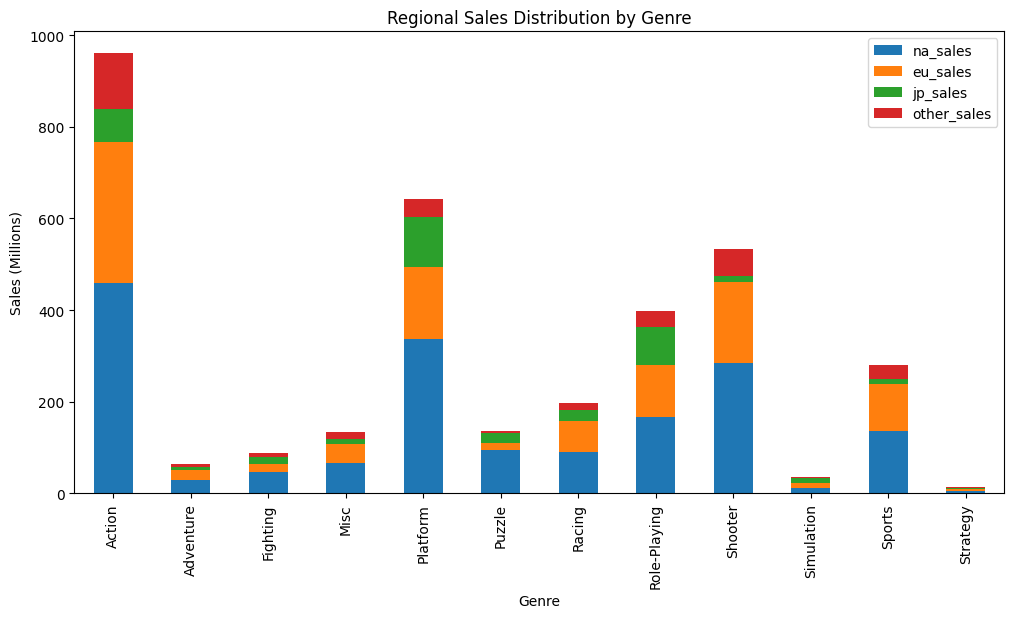

In [55]:
# Regional sales by genre

regional_genre = merged_df.groupby('sales_genre')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
regional_genre.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Regional Sales Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Sales (Millions)")
plt.show()

### Regional Genre Insights

- Different regions prefer different genres.
- Japan shows stronger preference for specific categories.
- NA and EU markets drive most global revenue.

Business Insight:
Localization and regional marketing strategies are critical for maximizing global reach.

## 🎯 Key Genre Insights Summary

- Action genre dominates long-term global sales.
- Shooter and Platform genres show strong performance during console peaks.
- Genre popularity shifts based on platform evolution and player preferences.
- Regional markets show different genre strengths.

Strategic Takeaway:
Game studios should balance investment between high-performing mainstream genres and emerging niche categories.

## Chart 16 - ⭐ Game Rating Distribution

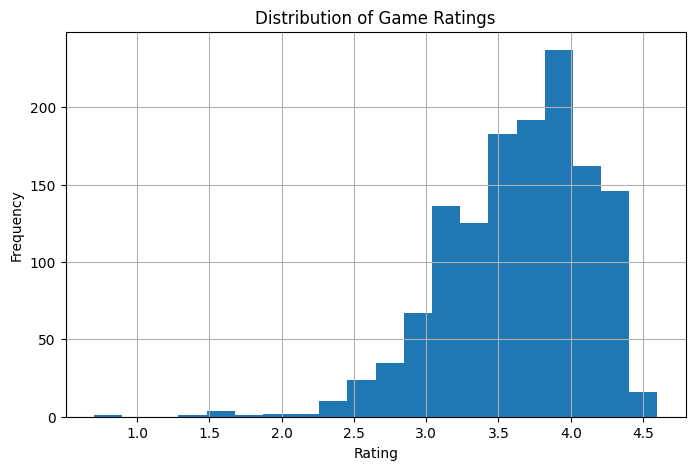

In [56]:
plt.figure(figsize=(8,5))
merged_df['rating'].hist(bins=20)
plt.title("Distribution of Game Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Rating Distribution Insights

- Majority of games cluster around mid-to-high rating range.
- Few extreme low-rating titles exist.
- Quality consistency influences player trust.

Business Insight:
Maintaining consistent game quality helps sustain market reputation.

## Chart 17 - 🎮 Platform vs Genre Popularity Heatmap

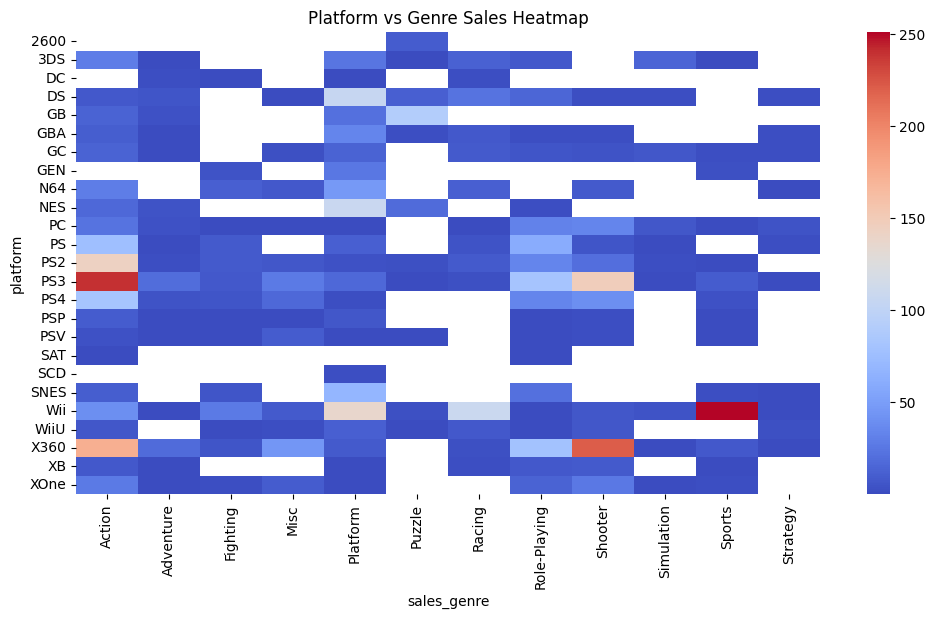

In [57]:
platform_genre = merged_df.pivot_table(values='global_sales', index='platform', columns='sales_genre', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(platform_genre, cmap='coolwarm')
plt.title("Platform vs Genre Sales Heatmap")
plt.show()

### Platform vs Genre Insights

- Certain genres perform better on specific platforms.
- Platform ecosystem influences genre success.
- Strategic platform targeting can improve sales outcomes.

## 📌 Key Business Recommendations

- Focus development on high-growth genres.
- Align release timing with emerging platforms.
- Invest in engagement-driven features.
- Tailor marketing strategies regionally.

# 📌 Final Business Conclusion

- The video game industry experienced peak growth between 2005–2012 driven by console gaming.
- Action, Shooter, and Platform genres dominate total sales.
- Wii, PS3, and Xbox 360 platforms generated the highest revenue.
- Engagement metrics strongly influence long-term sales performance.
- North America and Europe remain the largest gaming markets.

**Overall Recommendation:**  
Game companies should focus on high-engagement multiplayer titles, cross-platform releases, and digital-first strategies to sustain long-term growth.


## 🎯 Future Analysis Opportunities

- Predictive modeling for game success.
- Player segmentation analysis.
- Platform lifecycle forecasting.

In [58]:
# Final column ordering for SQL and Power BI
final_columns = [
    'title','platform','publisher','sales_genre',
    'release_year','rating',
    'na_sales','eu_sales','jp_sales','other_sales','global_sales',
    'plays','playing','backlogs','wishlist',
    'num_reviews','sales_per_review','engagement_ratio'
]

merged_df = merged_df[final_columns]

In [60]:
merged_df.to_csv("final_video_game_dataset.csv", index=False)